In [58]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import colormaps

filename = 'agent_log_32'
hms = True
vid = False

x_max = 200
y_max = 200
z_max = 25

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.style.use("seaborn-v0_8-whitegrid")

In [59]:
df = pd.read_csv("../sosi/outputs/" + filename + ".csv")
n = len(df["type"].unique())
colors = colormaps['tab10'].colors

In [60]:
counts_per_type = df.value_counts(['type', 'tick'])

In [61]:
df_first = df[df["tick"] == 0]
df_last = df[df["tick"] == df["tick"].max()]
print('\t\t tick = 0', '\t tick =', df["tick"].max())
print(
    "Total:\t\t",
    len(df_first),
    '\t\t',
    len(df_last),
    '\n'
)
print('Bacteria:\t', len(df_first[df_first["type"] == 0]), '\t\t', len(df_last[df_last["type"] == 0]))
print('Fungi:\t\t', len(df_first[df_first["type"] == 1]), '\t\t', len(df_last[df_last["type"] == 1]))
print('R.F. Nems:\t', len(df_first[df_first["type"] == 2]), '\t\t', len(df_last[df_last["type"] == 2]))
print('B. Nems:\t', len(df_first[df_first["type"] == 3]), '\t\t', len(df_last[df_last["type"] == 3]))
print('F. Nems:\t', len(df_first[df_first["type"] == 4]), '\t\t', len(df_last[df_last["type"] == 4]))
print('O. Nems:\t', len(df_first[df_first["type"] == 5]), '\t\t', len(df_last[df_last["type"] == 5]))
print('F. Mites:\t', len(df_first[df_first["type"] == 6]), '\t\t', len(df_last[df_last["type"] == 6]))
print('O. Mites:\t', len(df_first[df_first["type"] == 7]), '\t\t', len(df_last[df_last["type"] == 7]))
print('Collembolans:\t', len(df_first[df_first["type"] == 8]), '\t\t', len(df_last[df_last["type"] == 8]))

		 tick = 0 	 tick = 50
Total:		 97600 		 207582 

Bacteria:	 36000 		 38476
Fungi:		 24000 		 98085
R.F. Nems:	 8000 		 25068
B. Nems:	 12000 		 9901
F. Nems:	 10000 		 26302
O. Nems:	 1600 		 2545
F. Mites:	 3600 		 3823
O. Mites:	 800 		 1600
Collembolans:	 1600 		 1782


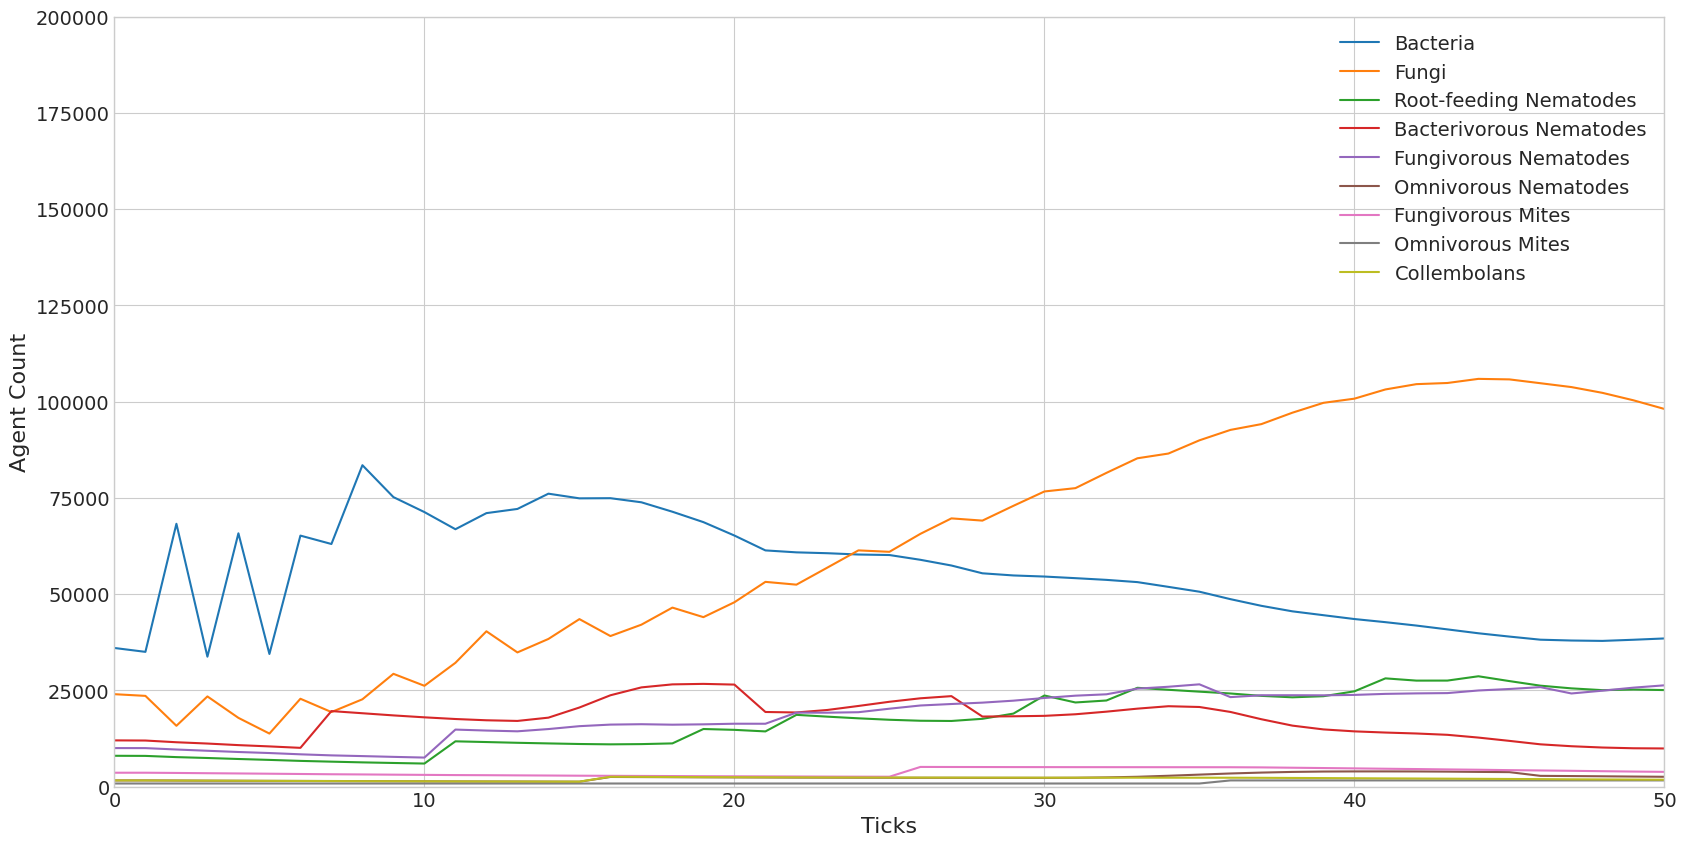

In [62]:
organism_group_labels = ["Bacteria", "Fungi", "Root-feeding Nematodes", "Bacterivorous Nematodes", "Fungivorous Nematodes", "Omnivorous Nematodes", "Fungivorous Mites", "Omnivorous Mites", "Collembolans"]
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

for i in range(len(df['type'].unique())):
    plt.plot(
        range(len(df["tick"].unique())),
        counts_per_type[i].reindex(range(len(df['tick'].unique())), fill_value=0).sort_index().to_list(),
        label=organism_group_labels[i],
        color=colors[i]
    )
ax.set_xlim(0, 50)
ax.set_ylim(0, 200000)
ax.set_xlabel("Ticks")
ax.set_ylabel("Agent Count")

plt.legend()
plt.savefig("./agent_counts_viz/" + filename + ".pdf", format="pdf", bbox_inches="tight")
plt.show()

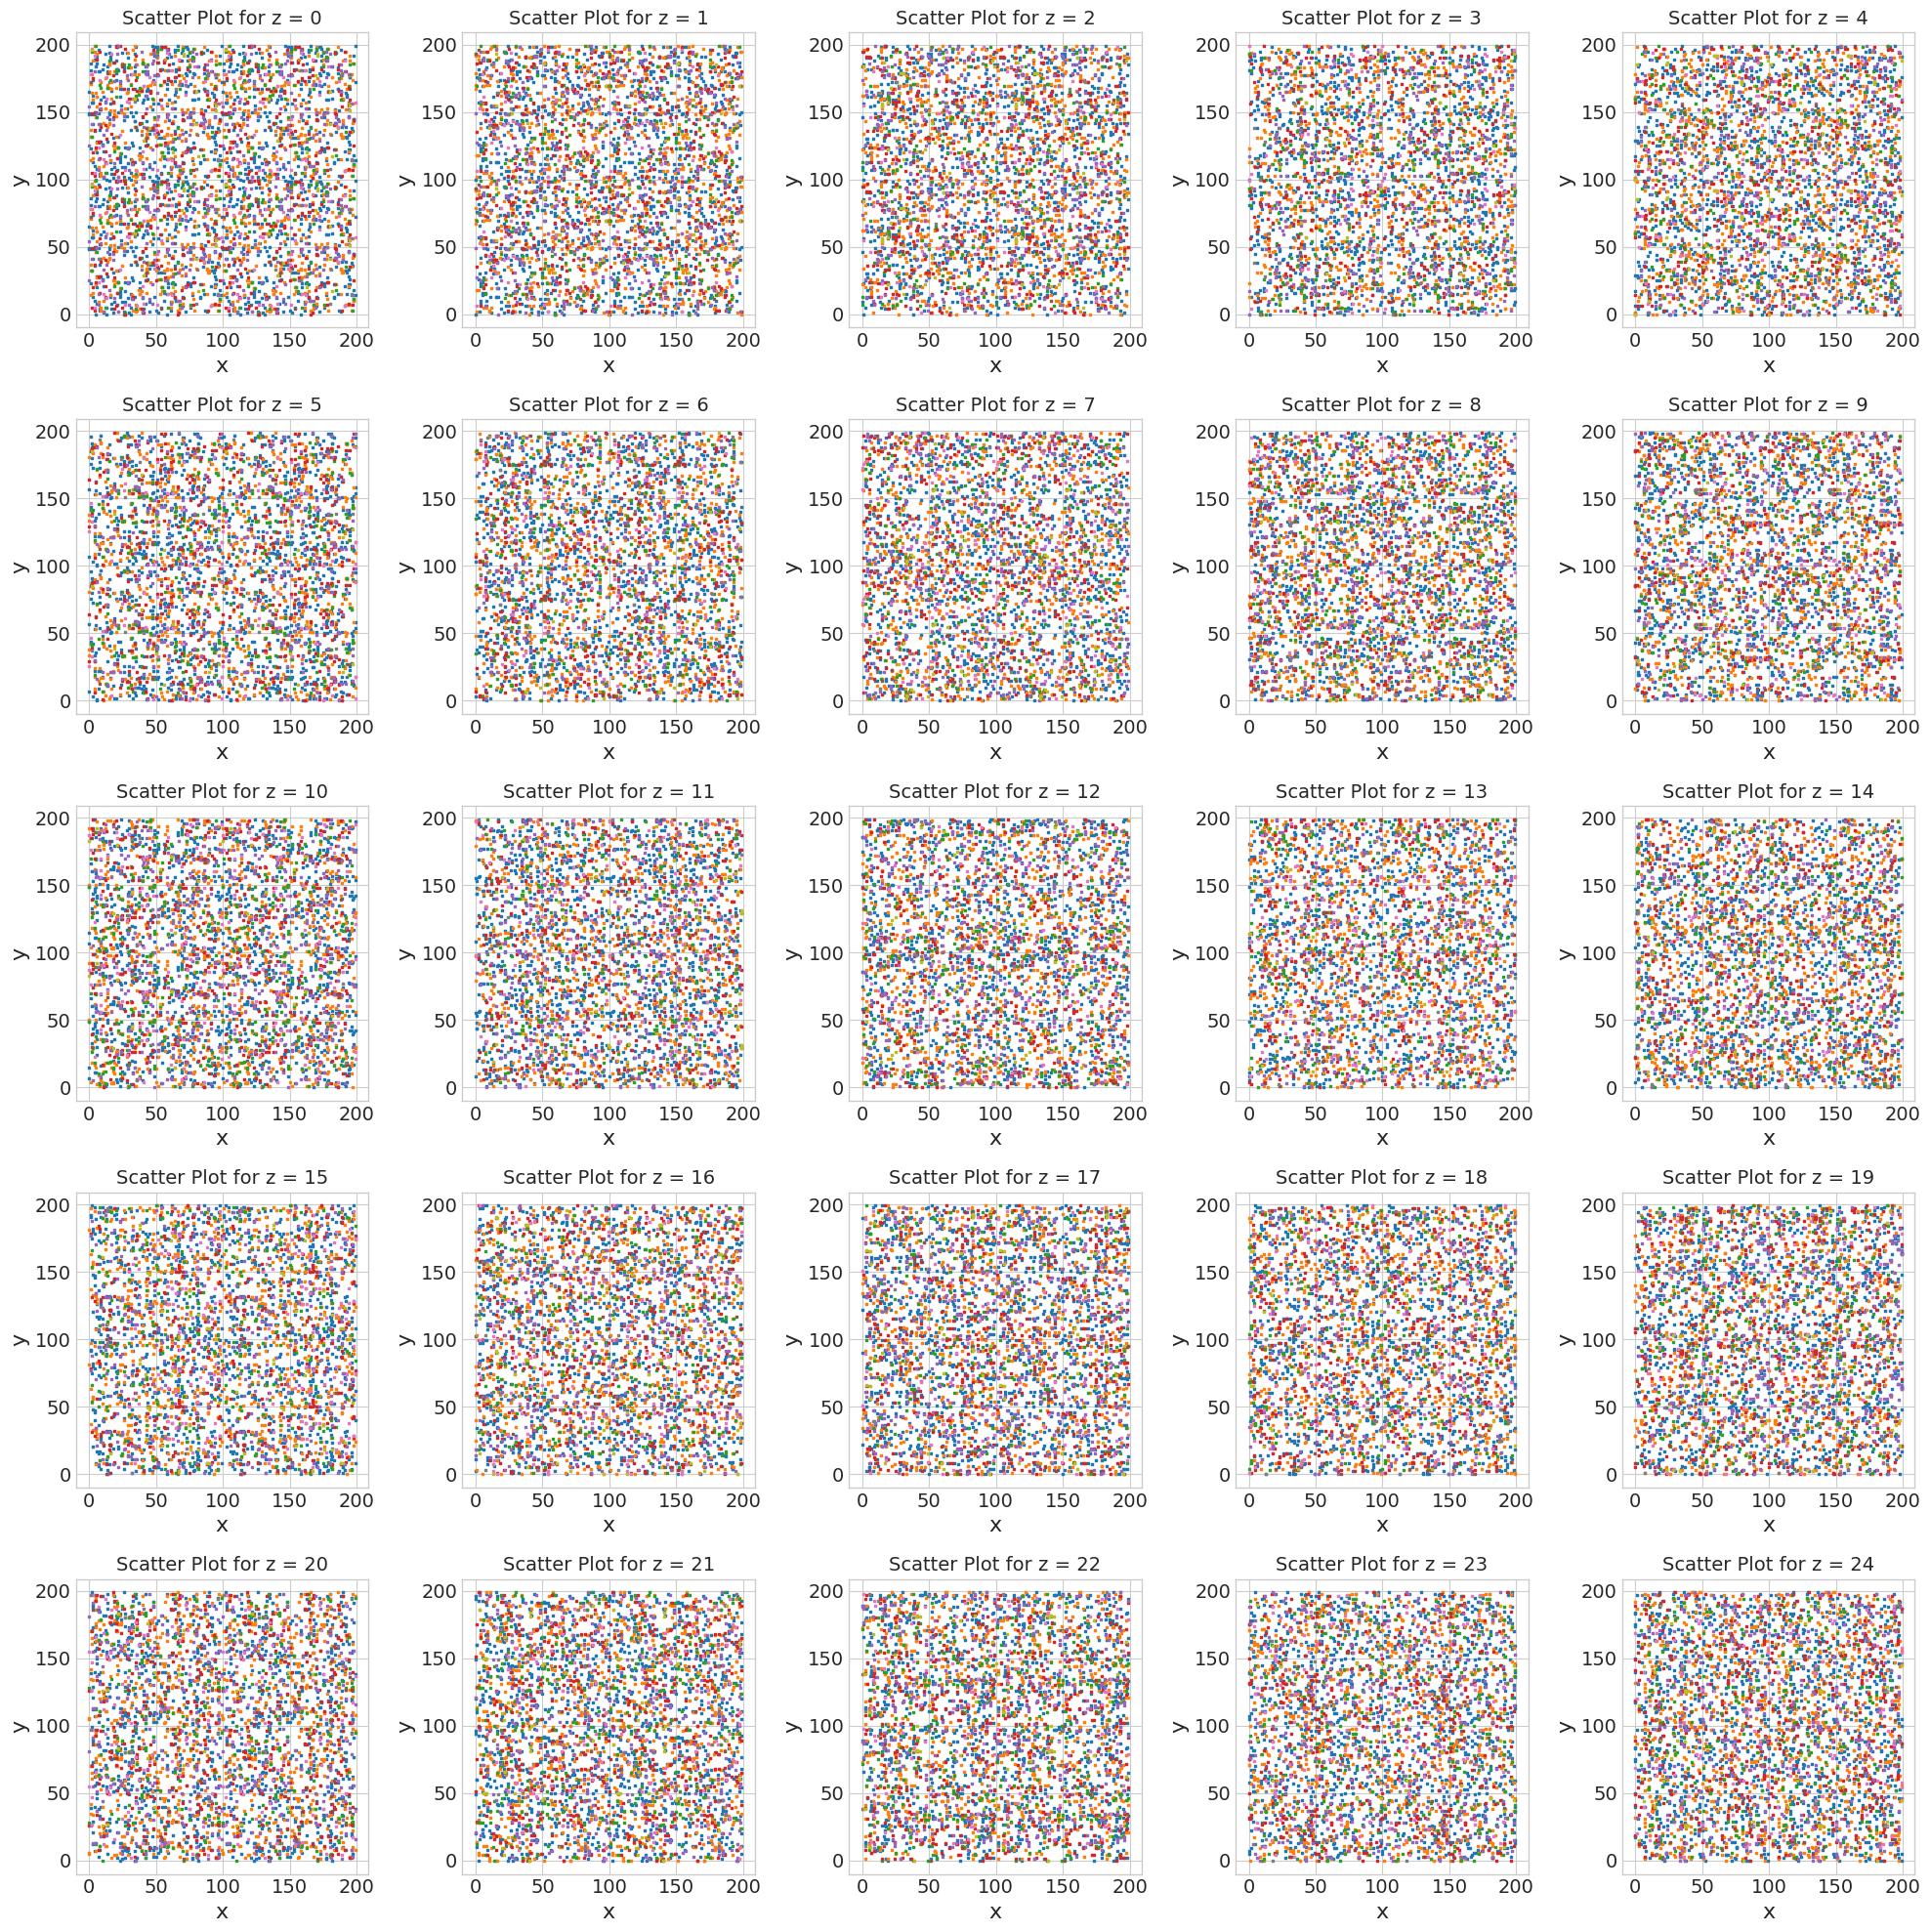

In [63]:
if hms:
    z_range = range(z_max)
    
    fig, axes = plt.subplots(5, 5, figsize=(20, 20))
    axes = axes.flatten()
    
    df1 = df[df["tick"] == 0]
    
    for i, z in enumerate(z_range):
        ax = axes[i]
        subset = df1[df1['z'] == z]
        for t in np.unique(df1["type"]):
            subset_type = subset[subset['type'] == t]
            ax.scatter(subset_type['x'], subset_type['y'], color=colors[t], label=t, s=1, marker='s')
        ax.set_title(f'Scatter Plot for z = {z}')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
    
    plt.tight_layout()
    plt.savefig("./heatmaps/" + filename + "_hm_start.pdf", format="pdf", bbox_inches="tight")
    plt.show()

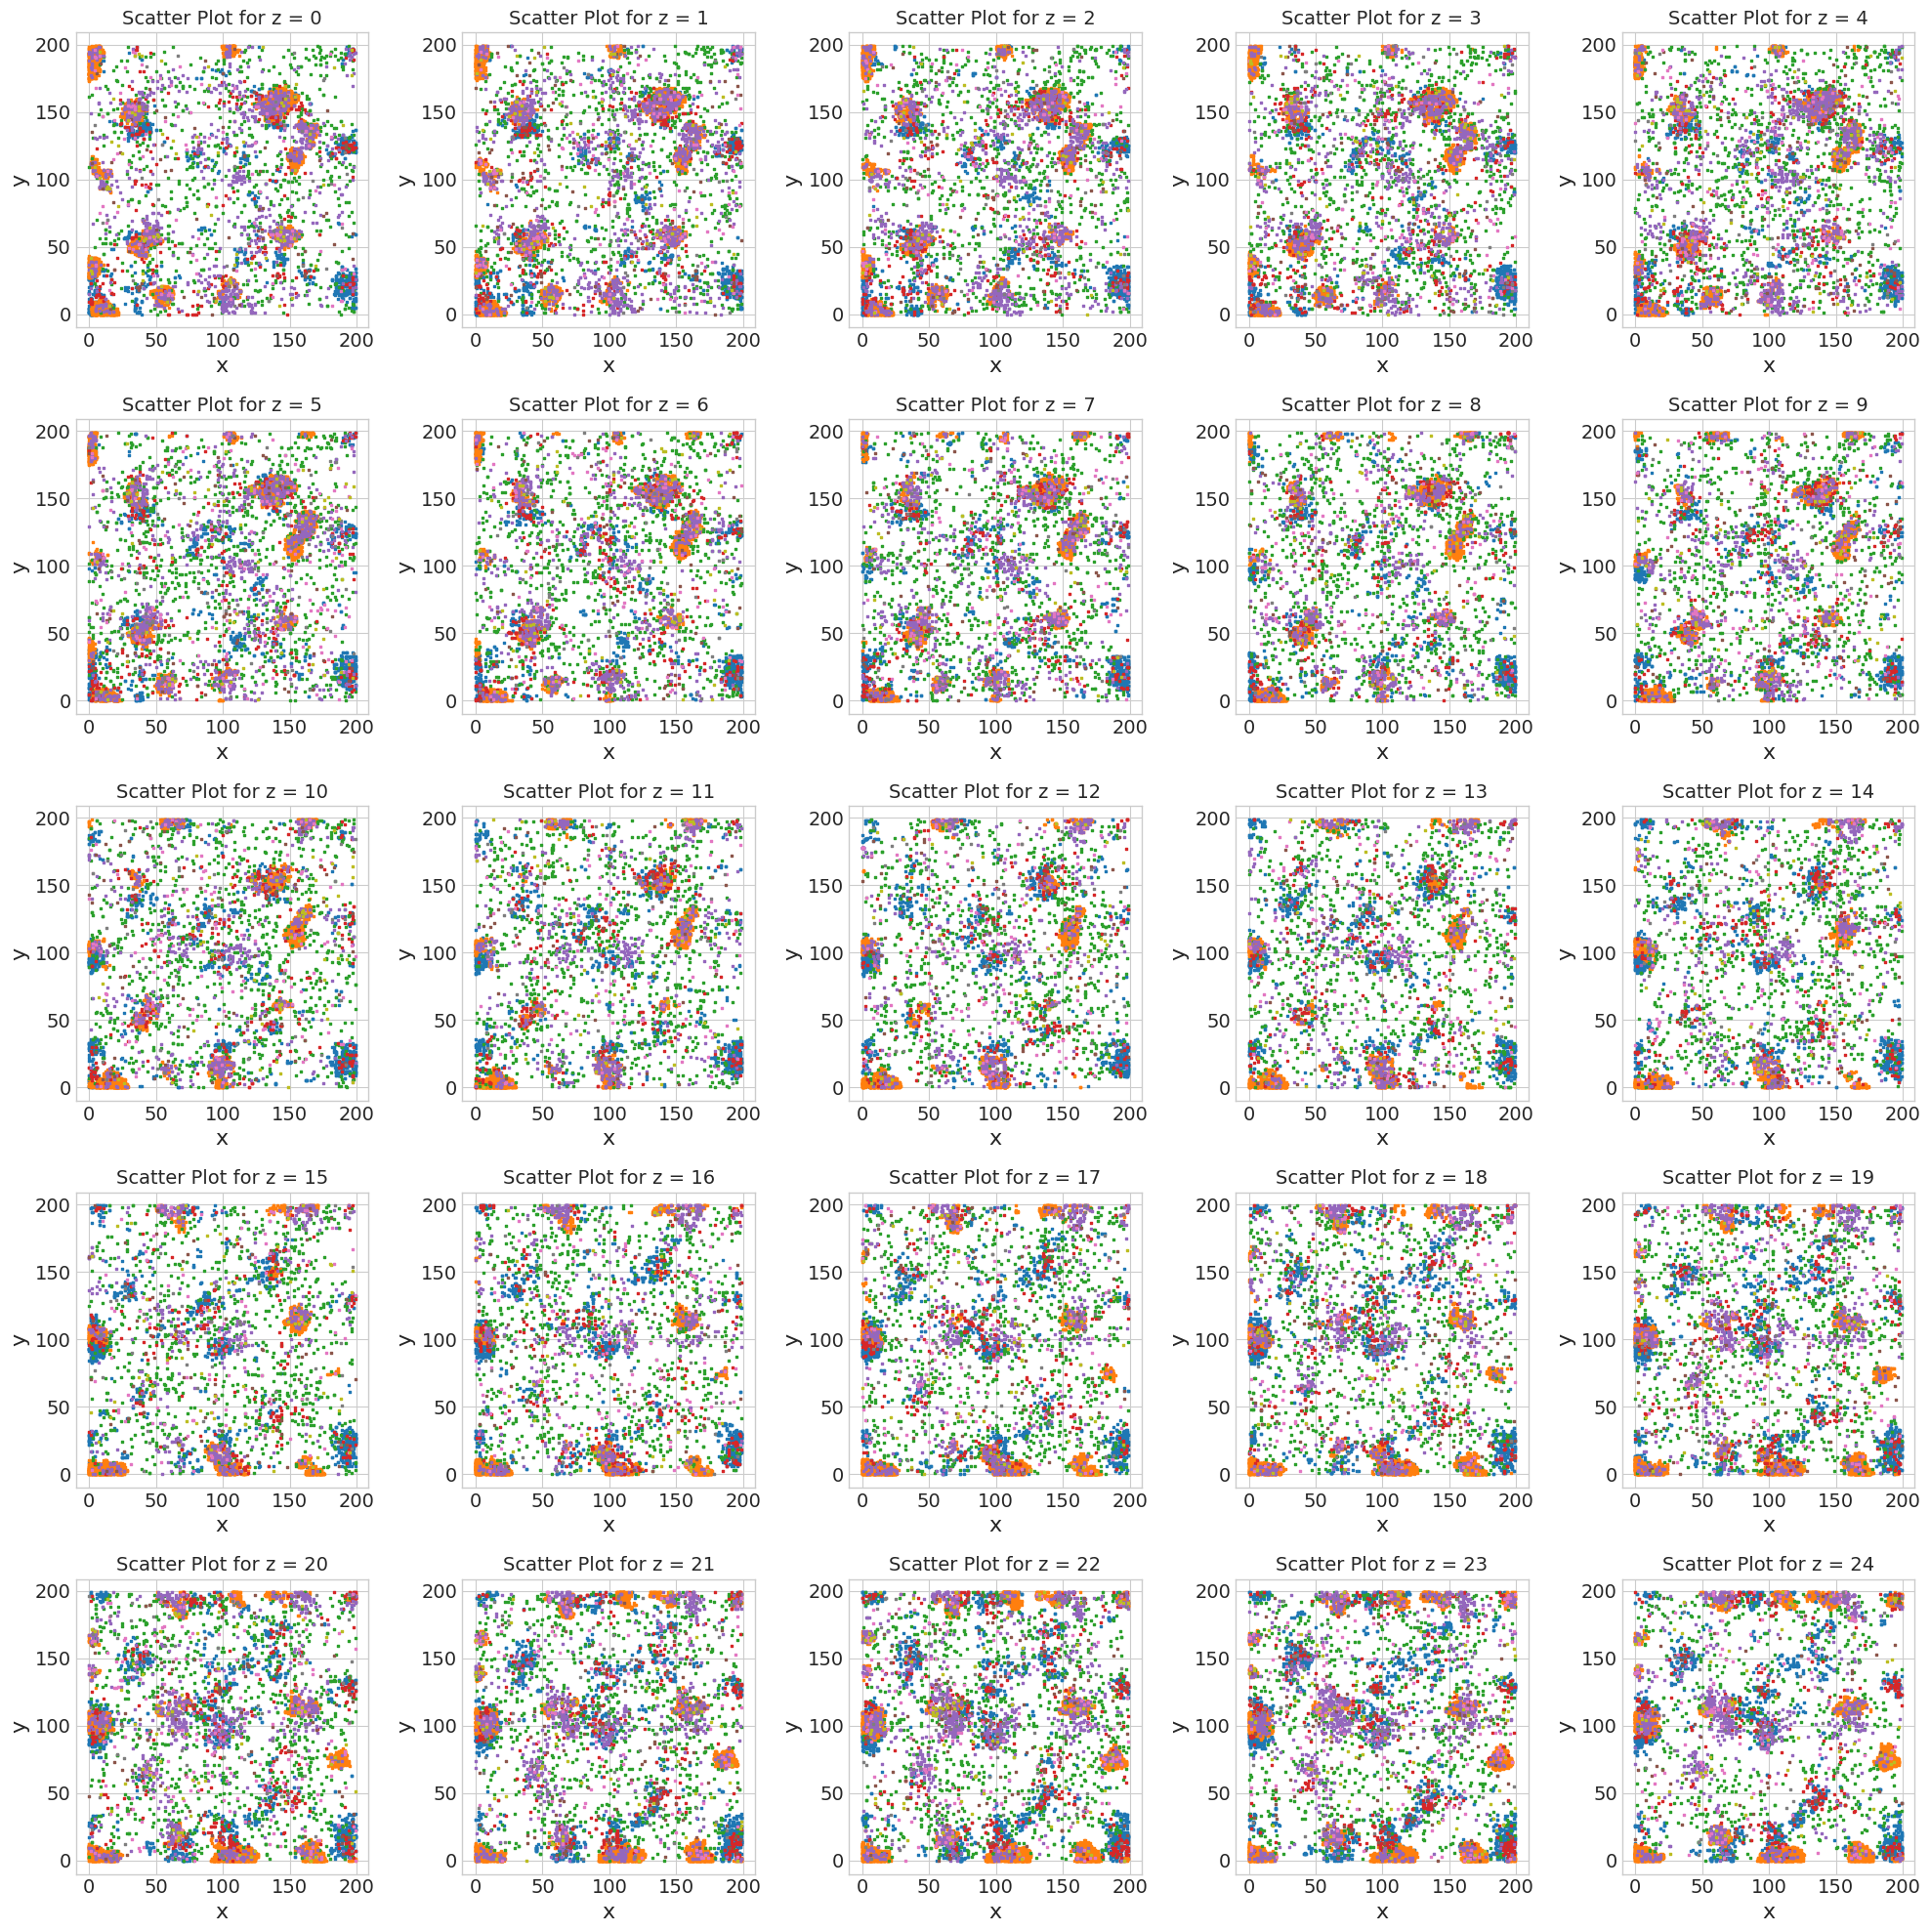

In [64]:
if hms:
    z_range = range(z_max)
    
    fig, axes = plt.subplots(5, 5, figsize=(20, 20))
    axes = axes.flatten()
    
    df1 = df[df["tick"] == df["tick"].max()]
    
    for i, z in enumerate(z_range):
        ax = axes[i]
        subset = df1[df1['z'] == z]
        for t in np.unique(df1["type"]):
            subset_type = subset[subset['type'] == t]
            ax.scatter(subset_type['x'], subset_type['y'], color=colors[t], label=t, s=1, marker='s')
        ax.set_title(f'Scatter Plot for z = {z}')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
    
    plt.tight_layout()
    plt.savefig("./heatmaps/" + filename + "_hm_end.pdf", format="pdf", bbox_inches="tight")
    plt.show()

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

def update(t):
    ax.cla()
    data = df[df["tick"] == t]

    for g in np.unique(data["type"]):
        ix = np.where(data["type"] == g)
        ax.scatter(
            data.iloc[ix]["x"],
            data.iloc[ix]["y"],
            data.iloc[ix]["z"],
            color=colors[g],
            label=organism_group_labels[g],
            s=1,
            depthshade=True,
            marker='s',
            alpha=1
            )

    ax.set_aspect('equal')
    
    ax.set_xlim(0, x_max)
    ax.set_ylim(0, y_max)
    ax.set_zlim(0, z_max)
    
    ax.set_xlabel("X", labelpad=10)
    ax.set_ylabel("Y", labelpad=10)
    ax.set_zticks([])
    
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.set_facecolor("white")


if vid:
    fig = plt.figure(figsize=(10, 10), dpi=150)
    ax = fig.add_subplot(projection="3d")
    ax.view_init(30, 225)
    ax.set_facecolor("white")

    ani = FuncAnimation(fig=fig, func=update, frames=df["tick"].max(), interval=100)

    ani.save("vids/" + filename + ".mp4")

    plt.show()